### Problem Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, ttest_ind, f_oneway, chi2_contingency, spearmanr, shapiro
from statsmodels.stats.weightstats import ztest

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from datetime import datetime
from scipy import stats

In [3]:
# reading the csv file
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# No Missing values present in the given data
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# getting the information about the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
# categorising time 
time_category = { 1 : 'Morning 8 Am to 12 Pm (noon)',
                  2 : 'Afternoon 12 Pm to 5 Pm',
                  3 : 'Evening 5 Pm to 9 Pm',
                  4 : 'Night 9 pm to 12 Am',
                  5 : 'Late Night 12 Am to 4 Am',
                  6 : 'Early Morning 4 Am to 8 Am'
                }
def time(time):
    return int(time[11:13])

def time_category_check(time):
    if time >= 8 and time < 12:
        return time_category[1]
    if time >= 12 and time < 17:
        return time_category[2]
    if time >= 17 and time < 21:
        return time_category[3]
    if time >= 21 and time <= 23:
        return time_category[4]
    if time >= 0 and time < 4:
        return time_category[5]
    return time_category[6]

df['time_category'] = df['datetime'].apply(time)
df['time_category'] = df['time_category'].apply(time_category_check)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_category
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Late Night 12 Am to 4 Am
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Late Night 12 Am to 4 Am
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Late Night 12 Am to 4 Am
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Late Night 12 Am to 4 Am
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Early Morning 4 Am to 8 Am


In [8]:
#categorising weather, season, working day, holiday

weather_category = { 1: 'Clear, Few clouds, partly cloudy, partly cloudy',
                     2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                     3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                     4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
                    }

def season_check(season):
    if (season == 1):
        return 'Spring'
    if (season == 2):
        return 'Summer'
    if (season == 3):
        return 'Fall'
    return 'Winter'

def working_day(day):
    if (day == 1):
        return 'Working Day'
    return 'Not Wokring Day'

def holiday_check(day):
    if (day == 1):
        return 'Holiday'
    return 'Not Holiday'  

def weather_check(weather):
    return weather_category[weather]

df['season'] = df['season'].apply(season_check)
df['workingday'] = df['workingday'].apply(working_day)
df['holiday'] = df['holiday'].apply(holiday_check)
df['weather'] = df['weather'].apply(weather_check)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_category
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,81,0.0,3,13,16,Late Night 12 Am to 4 Am
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,8,32,40,Late Night 12 Am to 4 Am
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,5,27,32,Late Night 12 Am to 4 Am
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,3,10,13,Late Night 12 Am to 4 Am
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,0,1,1,Early Morning 4 Am to 8 Am


In [9]:
#finding month, day from given datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day_name()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_category,month,day
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,81,0.0,3,13,16,Late Night 12 Am to 4 Am,January,Saturday
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,8,32,40,Late Night 12 Am to 4 Am,January,Saturday
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.02,13.635,80,0.0,5,27,32,Late Night 12 Am to 4 Am,January,Saturday
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,3,10,13,Late Night 12 Am to 4 Am,January,Saturday
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Wokring Day,"Clear, Few clouds, partly cloudy, partly cloudy",9.84,14.395,75,0.0,0,1,1,Early Morning 4 Am to 8 Am,January,Saturday


In [15]:
#categorical columns, numerical columns
cat_cols = ['day', 'season', 'workingday', 'holiday', 'season', 'weather']
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

#### Univariate Analysis

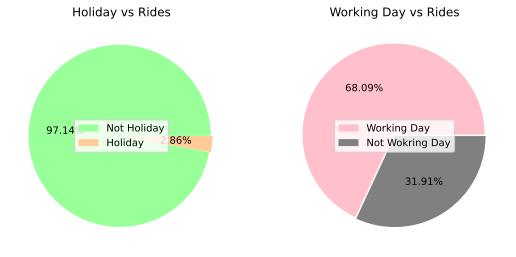

In [11]:
colors = ['#99ff99','#ffcc99']
num_cols = ['holiday', 'workingday']

fig = plt.figure(figsize = (9,12))

plt.subplot(2,2,1)
pie_plot = df['holiday'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = colors, explode = [0.02, 0], legend = True, labeldistance=None)
plt.ylabel('')
plt.title('Holiday vs Rides')
pie_plot.legend(loc = 'center')

plt.subplot(2,2,2)
pie_plot = df['workingday'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = ['Pink', 'Grey'], explode = [0.02, 0], legend = True, labeldistance=None)
plt.ylabel('')
plt.title('Working Day vs Rides')
pie_plot.legend(loc = 'center')
plt.show()


> `There are more number of rides when there is no holiday and it is a working day`

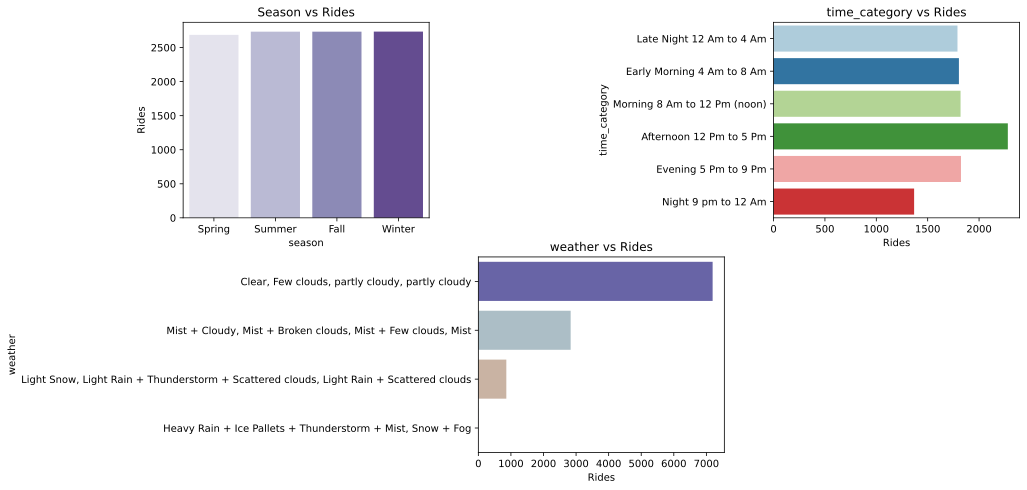

In [12]:
fig = plt.figure(figsize = (15,12))

plt.subplot(3,3,1)
sns.countplot(data = df, x = 'season', palette = 'Purples')
plt.ylabel('Rides')
plt.title('Season vs Rides')

plt.subplot(3,3,3)
sns.countplot(data = df, y = 'time_category', palette = 'Paired')
plt.xlabel('Rides')
plt.title('time_category vs Rides')

plt.subplot(3,3,5)
sns.countplot(data = df, y = 'weather', palette = 'twilight_shifted')
plt.xlabel('Rides')
plt.title('weather vs Rides')
plt.show()


>1. `There are almost same number of rides irrespective of season`
2. `There rides count were almost similar at every time, but a bit more between 12Pm to 5Pm`
3. `When the weather is clear, or partly couldy there are more number of rides`

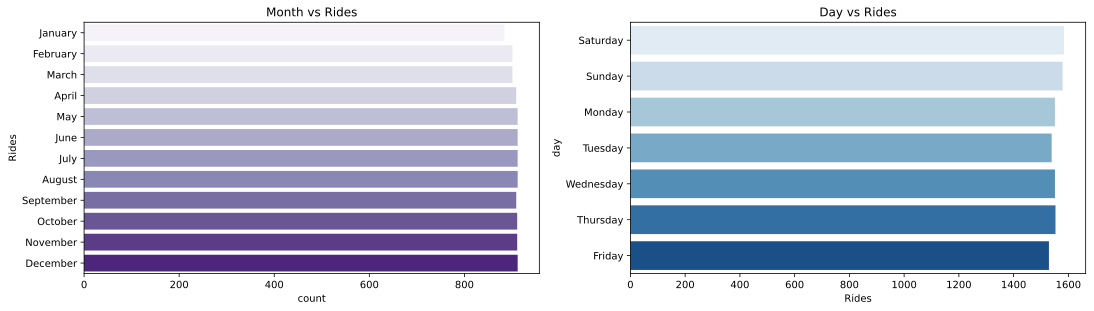

In [13]:
fig = plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(data = df, y = 'month', palette = 'Purples')
plt.ylabel('Rides')
plt.title('Month vs Rides')

plt.subplot(2,2,2)
sns.countplot(data = df, y = 'day', palette = 'Blues')
plt.xlabel('Rides')
plt.title('Day vs Rides')
plt.show()

> `There are almost similar number of rides in every month and in every day of the month`

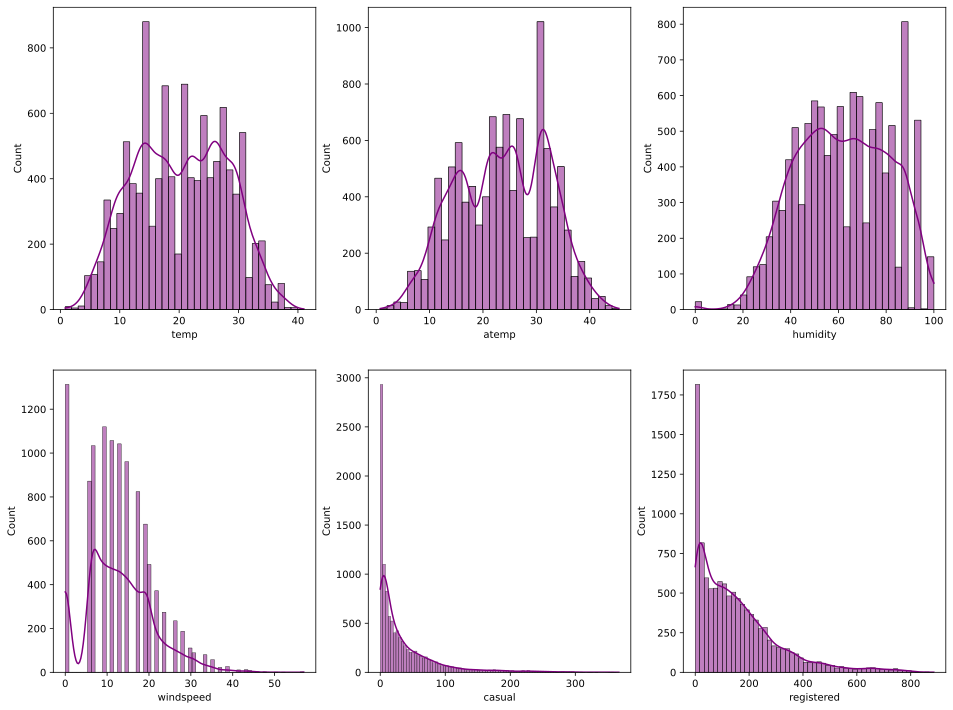

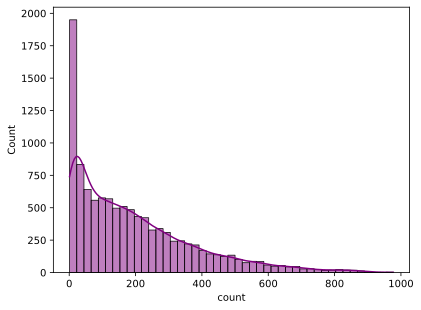

In [16]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(x=df[num_cols[index]], ax=axis[row, col], color = 'Purple', kde = True)
        index += 1
        
plt.show()
sns.histplot(x=df[num_cols[-1]], color = 'Purple', kde = True) 
plt.show()

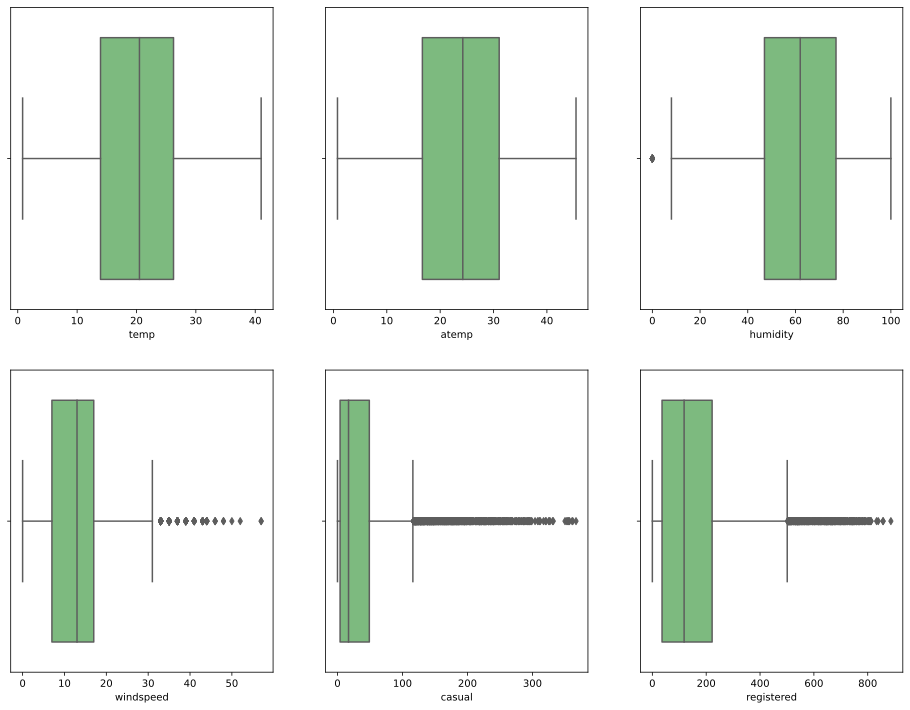

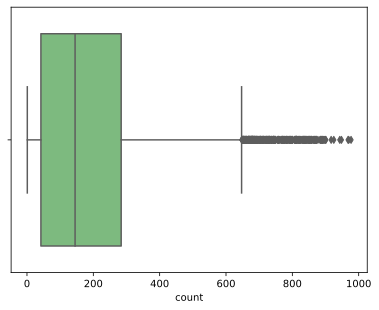

In [17]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col], palette = 'Greens')
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]], palette = 'Greens') 
plt.show()

> `There are some outliers in count, casual, registered, windspeed, humidity`

### Bivariate Analysis

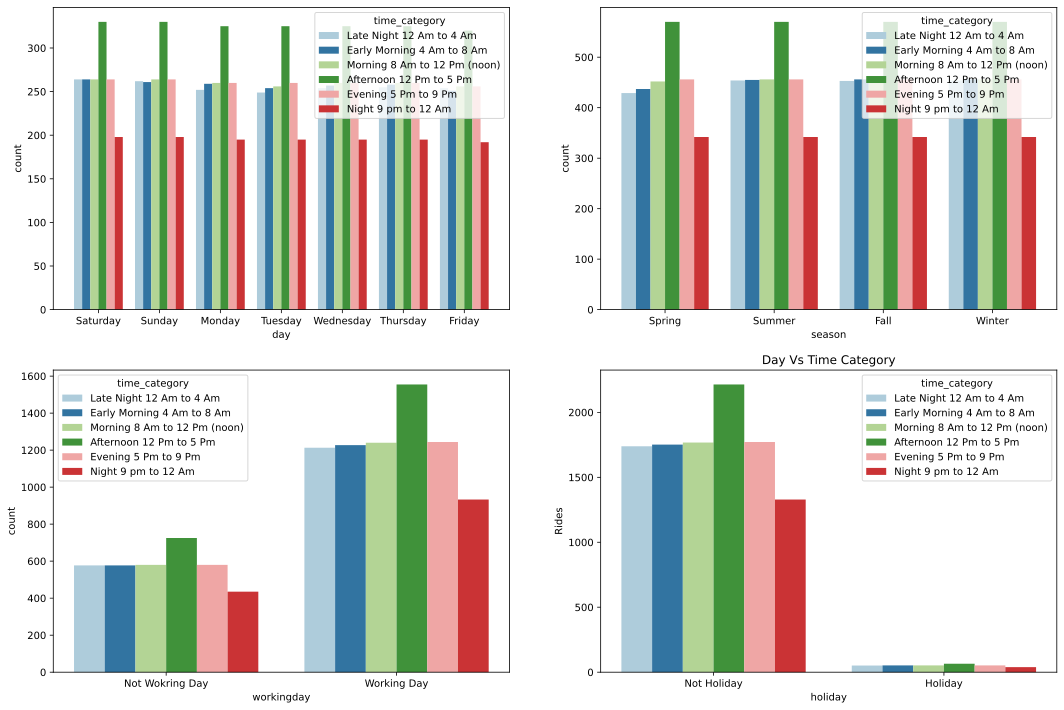

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize = (18,12))

index = 0
for row in range(2):
    for col in range(2):
        fig = sns.countplot(data = df,
                      x = cat_cols[index],
                      hue = 'time_category',
                      palette = 'Paired',
                      ax=axis[row, col])
        index += 1
        fig.plot(legend = None)
        plt.title('Day Vs Time Category')
        plt.ylabel('Rides')
plt.show()        


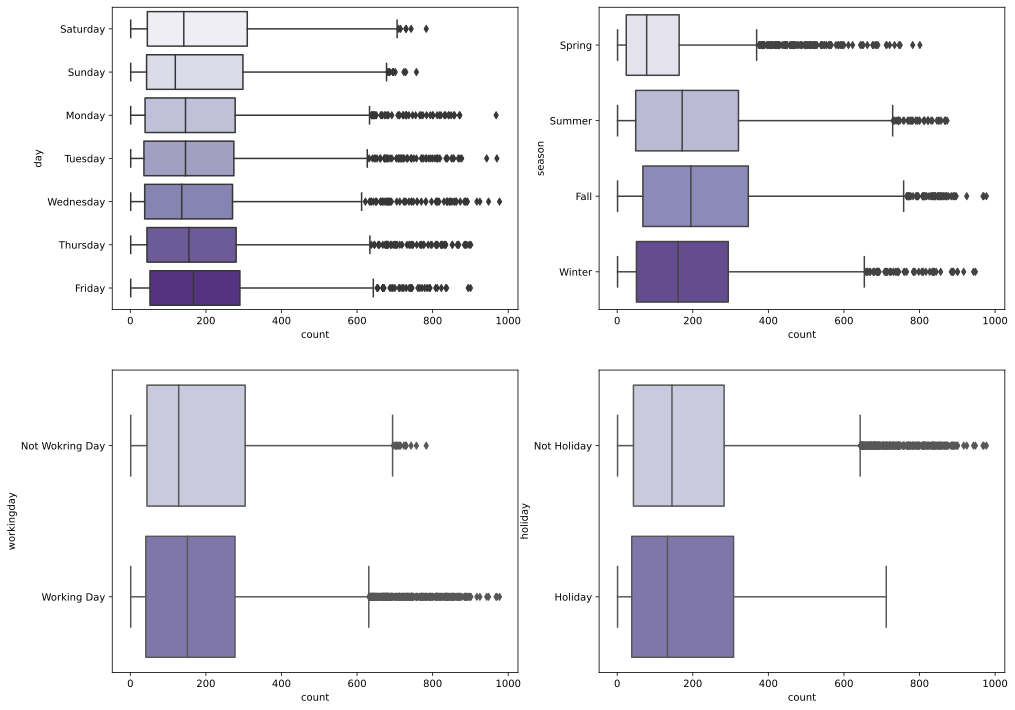

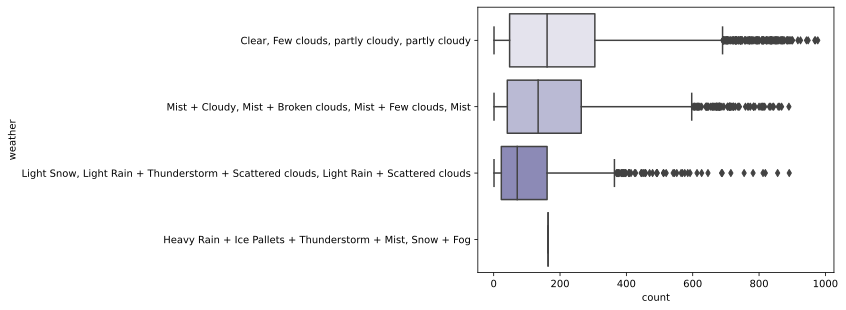

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, y=cat_cols[index], x='count', ax=axis[row, col], palette = 'Purples')
        index += 1
        
plt.show()
sns.boxplot(data=df, y=cat_cols[-1], x='count', palette = 'Purples')
plt.show()

>1. `In summer and fall seasons more bikes are rented as compared to other seasons`
2. `Whenever its a holiday more bikes are rented`
3. `It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented`
4. `Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented`

In [20]:
# fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# index = 0
# for row in range(2):
#     for col in range(3):
#         sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
#         index += 1
        
# plt.show()

>1. `Whenever the humidity is less than 20, number of bikes rented is very very low`
2. `Whenever the temperature is less than 10, number of bikes rented is less`
3. `Whenever the windspeed is greater than 35, number of bikes rented`

In [21]:
#correlation between count and other numerical variables
df.corr()['count']

/var/folders/q8/3zp2595n0pq58xz79672m8w00000gn/T/ipykernel_7558/2930503742.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

/var/folders/q8/3zp2595n0pq58xz79672m8w00000gn/T/ipykernel_7558/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


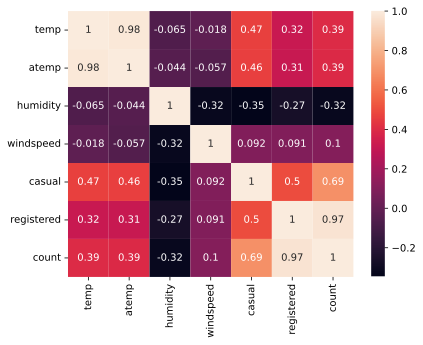

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Hypothesis Testing

##### Hypothesis testing, two tailed to check if Working Day has an effect on the number of electric cycles rented (10 points)

In [23]:
Ho = 'Wokring Days has no effect on the number of electric cycles rented'
Ha = 'Working Days has effect on the number of electric cycles rented' 

level_of_significance = 0.05

In [24]:
df_workingday = df[df['workingday'] == 'Working Day']['count']
df_workingday

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [25]:
n = df_workingday.shape[0]
print('Number of working days : ', n)

Number of working days :  7412


In [26]:
mu = df['count'].mean()
sigma = df['count'].std()
print('Mean: ', mu, 'and Std: ', sigma)

Mean:  191.57413191254824 and Std:  181.14445383028496


In [27]:
z_stat = ((df_workingday.mean() - mu)/(sigma/np.sqrt(n)))
z_stat

0.6833185942112557

In [28]:
p_value = (1 - norm.cdf(z_stat)) * 2
p_value 

0.49440554712157003

In [29]:
if p_value < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Failed to reject Ho:  Wokring Days has no effect on the number of electric cycles rented


##### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)

In [30]:
Ho = 'Wokring Days has no effect on the number of electric cycles rented'
Ha = 'Working Days has effect on the number of electric cycles rented' 

level_of_significance = 0.05

In [31]:
df_workingday = df[df['workingday']=='Not Wokring Day']['count'].values
df_notworkingday = df[df['workingday']=='Working Day']['count'].values

In [32]:
test_stat, pval = ttest_ind(df_workingday, df_notworkingday, equal_var=True)
print('test stat: ', test_stat, ', pval: ', pval)

test stat:  -1.2096277376026694 , pval:  0.22644804226361348


In [33]:
if p_value < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Failed to reject Ho:  Wokring Days has no effect on the number of electric cycles rented


#### ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)

##### Weather

In [34]:
Ho = 'Weather has no effect on the number of electric cycles rented'
Ha = 'Weather has effect on the number of electric cycles rented' 

level_of_significance = 0.05

In [35]:
weather_cat = list(df['weather'].unique())
weather_count_val =[]

for weather in weather_cat:
    weather_count_val.append(df[df['weather'] == weather]['count'].values)  

In [36]:
test_stat, pval = f_oneway(weather_count_val[0],weather_count_val[1],weather_count_val[2],weather_count_val[3])
print('test stat: ', test_stat, ', pval: ', pval)

test stat:  65.53024112793271 , pval:  5.482069475935669e-42


In [37]:
if pval < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Reject Ho :  Weather has effect on the number of electric cycles rented


##### Season

In [38]:
Ho = 'Season has no effect on the number of electric cycles rented'
Ha = 'Season has effect on the number of electric cycles rented' 

level_of_significance = 0.05

In [39]:
season_cat = list(df['season'].unique())
season_count_val =[]

for season in season_cat:
    season_count_val.append(df[df['season'] == season]['count'].values)  

In [40]:
test_stat, pval = f_oneway(season_count_val[0],season_count_val[1],season_count_val[2],season_count_val[3])
print('test stat: ', test_stat, ', pval: ', pval)

test stat:  236.94671081032106 , pval:  6.164843386499654e-149


In [41]:
if pval < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Reject Ho :  Season has effect on the number of electric cycles rented


#### Chi-square test to check if Weather is dependent on the season (10 points)

In [42]:
Ho = 'Weather is not dependent on season'
Ha = 'Weather is dependent on season' 

level_of_significance = 0.05

In [43]:
season_weather = pd.crosstab(index = df['season'], columns = df['weather'])
season_weather

weather,"Clear, Few clouds, partly cloudy, partly cloudy","Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
season,,,,
Fall,1930,0,199,604
Spring,1759,1,211,715
Summer,1801,0,224,708
Winter,1702,0,225,807


In [44]:
season_weather.drop(columns = ['Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'], inplace = True)
season_weather

weather,"Clear, Few clouds, partly cloudy, partly cloudy","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
season,,,
Fall,1930,199,604
Spring,1759,211,715
Summer,1801,224,708
Winter,1702,225,807


In [45]:
test_stat, pval, dof, expected = chi2_contingency(season_weather)
print('test stat: ', test_stat, ', pval: ', pval, ', dof: ', dof)

test stat:  46.10145731073249 , pval:  2.8260014509929343e-08 , dof:  6


In [46]:
if pval < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Reject Ho :  Weather is dependent on season


#### 2- Sample T-Test to check if holiday has an effect on the number of electric cycles rented (10 points)

In [47]:
Ho = 'Holiday has no effect on the number of electric cycles rented'
Ha = 'Holiday Days has effect on the number of electric cycles rented' 

level_of_significance = 0.05

In [48]:
df_holiday = df[df['holiday']=='Not Holiday']['count'].values
df_notholiday = df[df['holiday']=='Holiday']['count'].values

np.var(df_holiday), np.var(df_notholiday)

(32943.901106481346, 28233.99150132856)

In [49]:
test_stat, pval = ttest_ind(df_workingday, df_notworkingday, equal_var=True)
print('test stat: ', test_stat, ', pval: ', pval)

test stat:  -1.2096277376026694 , pval:  0.22644804226361348


In [50]:
if pval < level_of_significance:
    print('Reject Ho : ', Ha)
else:
    print('Failed to reject Ho: ', Ho)

Failed to reject Ho:  Holiday has no effect on the number of electric cycles rented


#### Insights
1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
3. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
4. Whenevr it is clear, partly cloudy more bikes are rented
5. Whenever the humidity is less than 20, number of bikes rented is very very low.
6. Whenever the temperature is less than 10, number of bikes rented is less.
7. Whenever the windspeed is greater than 35, number of bikes rented is less.

#### Recommendations

1. In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
2. With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3. In very low humid days, company should have less bikes in the stock to be rented.
4. Whenever temprature is less than 10 or in very cold days, company should have less bikes.
Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.

In [58]:
dup_rows = df[df.duplicated()]
print('The count of duplicated rows:', dup_rows.shape[0])

The count of duplicated rows: 0
